In [22]:
import warnings, os
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.metrics import auc as calculate_auc
from glob import glob
from statannot import add_stat_annotation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'white', font_scale=2)


In [23]:
def get_non_diag_mean(df):
    v = df.values.copy()
    
    np.fill_diagonal(v, np.nan)
    
    mean =  pd.DataFrame(v, columns = df.columns, index = df.index).mean(axis=1).round(2)
    std = pd.DataFrame(v, columns = df.columns, index = df.index).std(axis=1).round(2)
    return mean,std

In [24]:
flist = glob('*.xlsx')
flist

['lle_study2study_results_ROC.xlsx',
 'umap_study2study_results_ROC.xlsx',
 'mds_study2study_results_ROC.xlsx',
 'random_study2study_results_ROC.xlsx',
 'tsne_study2study_results_ROC.xlsx',
 'isomap_study2study_results_ROC.xlsx']

In [25]:
res = []
for x in flist:
    me = x.split('_')[0]
    
    dfres = pd.read_excel(x, index_col=0)
    dfres = dfres.rename(columns = {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'},
                        index =  {'AUS':"AUS", 'CHI':'CHN', 'FRA':'FRA', 'GER':'DEU', 'USA':'USA'}
                        )

    dfres = dfres.unstack().reset_index()
    dfres.columns = ['test_country', 'train_country', 'roc_auc']
    dfres['method'] = me
    res.append(dfres)

In [26]:
dfp = pd.concat(res,axis=0)

In [27]:
dfp = dfp[dfp.test_country != dfp.train_country]

In [28]:
dfp.roc_auc = dfp.roc_auc.astype(float)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

DEU_isomap v.s. DEU_umap: t-test paired samples, P_val=1.967e-02 stat=-4.569e+00
CHN_isomap v.s. CHN_umap: t-test paired samples, P_val=4.880e-01 stat=-7.884e-01
FRA_isomap v.s. FRA_umap: t-test paired samples, P_val=2.609e-03 stat=-9.327e+00
USA_isomap v.s. USA_umap: t-test paired samples, P_val=9.033e-02 stat=-2.467e+00
AUS_isomap v.s. AUS_umap: t-test paired samples, P_val=8.994e-02 stat=-2.472e+00
USA_lle v.s. USA_umap: t-test paired samples, P_val=6.465e-04 stat=-1.497e+01
FRA_lle v.s. FRA_umap: t-test paired samples, P_val=6.633e-03 stat=-6.753e+00
AUS_lle v.s. AUS_umap: t-test paired samples, P_val=1.374e-02 stat=-5.210e+00
DEU_lle v.s. DEU_umap: t-test paired samples, P_val=1.326e-02 stat=-5.278e+00
CHN_lle v.s. CHN_umap: t-test paired samples, P_val=5.757e-02 stat=-3.002e+00
USA_random v.s. USA_umap: t-test paired s

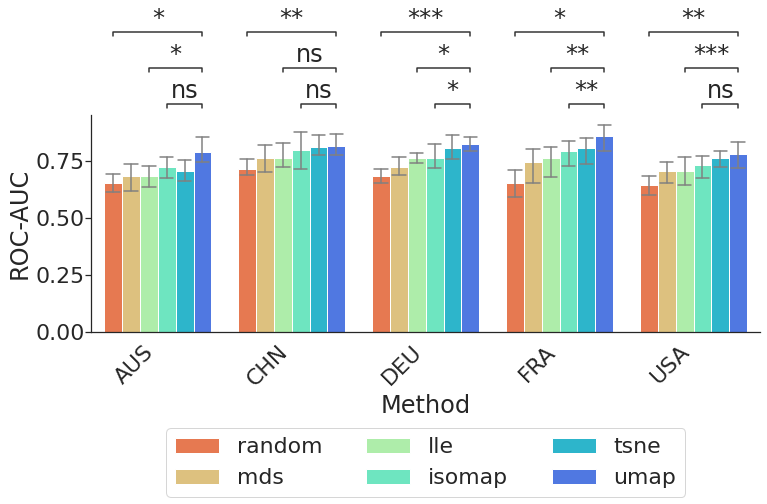

In [47]:
order = ['AUS', 'CHN', 'DEU', 'FRA', 'USA']

hue_order = ['random', 'mds', 'lle', 'isomap', 'tsne', 'umap']
color = sns.color_palette("rainbow_r", len(hue_order)) #PiYG
hue = 'method'
x = 'train_country'
y = 'roc_auc'


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), sharex=True, )

sns.barplot(x = x,
            y = y, 
            hue = hue, 
            data = dfp,  
            hue_order = hue_order,
            order = order, capsize=0.1, errcolor='.5', palette=color,
             errwidth=1.5) #color=color, 

#ax.set_ylim(0.83, 0.94)
# ax.legend().remove()
ax.set_ylabel('ROC-AUC')
ax.set_xlabel('Method')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
ax.legend(bbox_to_anchor=[0.5, -0.6], 
           loc='center', ncol=3)

box = [(('AUS', 'random'), ('AUS', 'umap')),
      (('AUS', 'lle'), ('AUS', 'umap')),
      (('AUS', 'isomap'), ('AUS', 'umap')),
    
    (('DEU', 'random'), ('DEU', 'umap')),
      (('DEU', 'lle'), ('DEU', 'umap')),      
      (('DEU', 'isomap'), ('DEU', 'umap')),
       
    (('CHN', 'random'), ('CHN', 'umap')),
      (('CHN', 'lle'), ('CHN', 'umap')),          
      (('CHN', 'isomap'), ('CHN', 'umap')),
       
    (('FRA', 'random'), ('FRA', 'umap')),
      (('FRA', 'lle'), ('FRA', 'umap')),          
      (('FRA', 'isomap'), ('FRA', 'umap')),
    (('USA', 'random'), ('USA', 'umap')),
      (('USA', 'lle'), ('USA', 'umap')),          
      (('USA', 'isomap'), ('USA', 'umap')),
      ]
    


add_stat_annotation(x = x,
                    y = y, 
                    hue = hue, 
                    data = dfp,  
                    hue_order = hue_order,
                    order = order,
                    ax=ax,
                    box_pairs=box,
                    test='t-test_paired',  #
                    comparisons_correction=None,
                    text_format='star', 
                    loc='outside', verbose=2)
    

plt.xticks(rotation=45, ha = 'right')
fig.savefig('./STST-CRC-Nation.pdf', bbox_inches='tight', dpi=400) 
